# First Capstone Check In

**Problem Statement**

Using polling data, demographic data, and a multitude of other variables can we correctly predict vote totals for the respective democratic candidates left on the March 17th primaries in Arizona, Florida, Ohio, and Illinois. 

# Methodology

The model at it's core will be simple. What I will do is match up county-level election results for the 2020 primaries which have passed pair that with demographic data and make predictions based on that. By March 17th I'll have all the results for the Super Tuesday states, and that information combined with county-level demographics should elicit a pretty robust model. 

The most important data needed are results from the 2016 primary, black percent of the county, white percent, unemployment, the share with a college degree, and population density. One varialbe left out of this process so far are polls. I will be using the 538 repository of state polls and applying any necessary techniques required to adjust for lack of polls in a certain state. 

# Questions For Matt

Can we use the relative proportions of voters from these four states as a prior in a Bayesian analysis of who we expect them to vote for in 2020?

And how can I start that sort of analysis?

I need to get some exit poll data form the previous primaries. 
And entrance poll data. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Data Cleaning and EDA

In [2]:
az = pd.read_csv('..//Datasets/2016_az.csv')
oh = pd.read_csv('..//Datasets/2016_ohio.csv')
fl = pd.read_csv('..//Datasets/2016_fl.csv')
ill = pd.read_csv('..//Datasets/2016_Ill.csv')
az_demog = pd.read_csv('..//Datasets/az_demogr.csv')
oh_demog = pd.read_csv('..//Datasets/ohio_demogr.csv')
fl_demog = pd.read_csv('..//Datasets/fl_demogr.csv')
ill_demog = pd.read_csv('..//Datasets/illi_demogr.csv')

# Arizona - Semi Closed Primary

A previously unaffiliated voter can participate in the primary of his or her choice. A voter who who previously affiliated with a political party can only vote in that party's primary.

In [3]:
az.head()

County Clinton Votes Sanders Votes
0    Apache         4,450         1,933
1   Cochise         4,654         3,265
2  Coconino         5,738         6,941
3      Gila         2,196         1,305
4    Graham           937           851

In [4]:
rm_comma = lambda x: x.replace(',', '')
az['Clinton Votes'] = az['Clinton Votes'].map(rm_comma).astype(int)
az['Sanders Votes'] = az['Sanders Votes'].map(rm_comma).astype(int)
az.dtypes

County           object
Clinton Votes     int64
Sanders Votes     int64
dtype: object

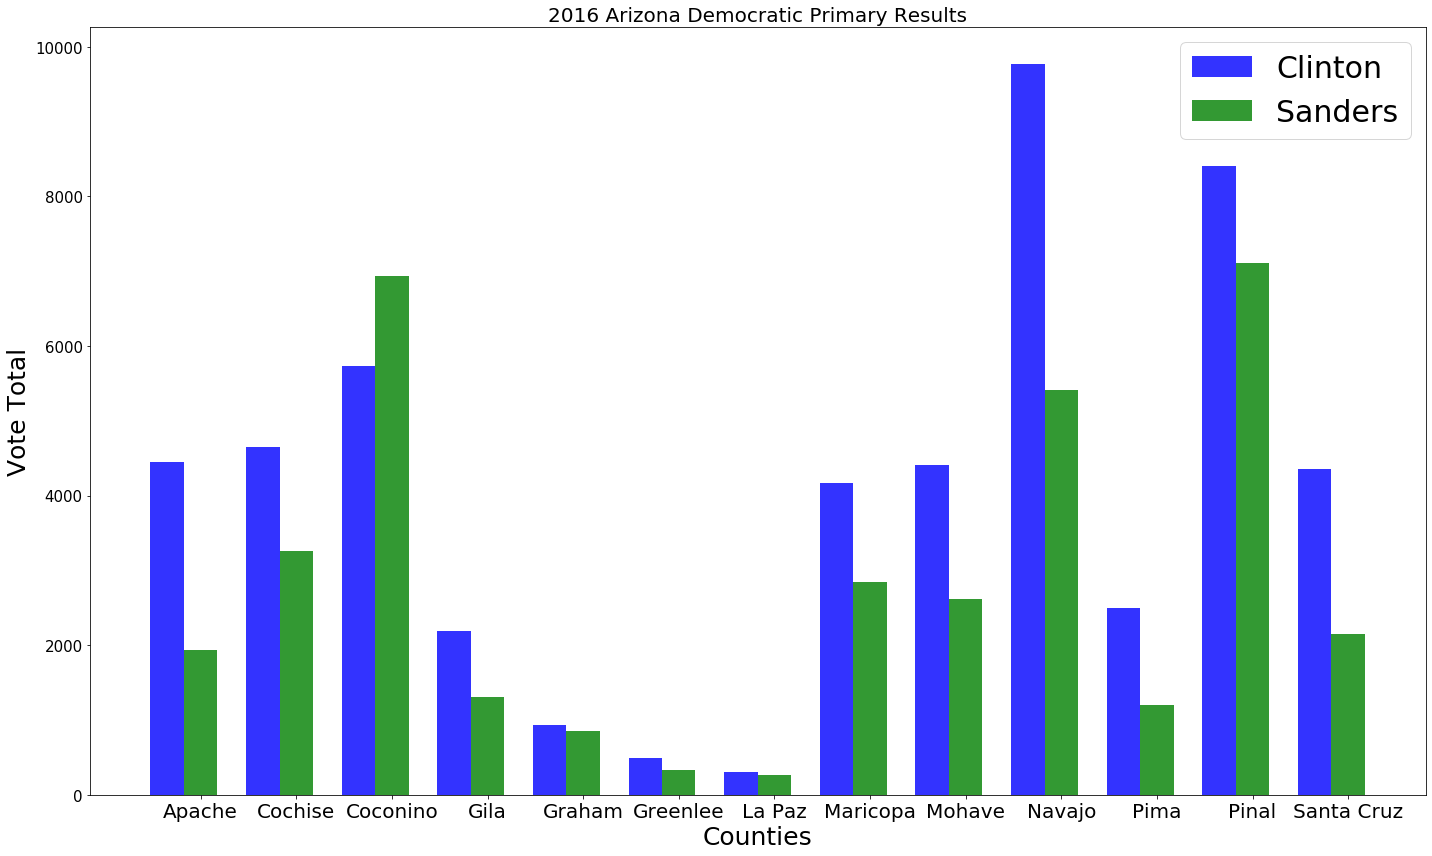

In [5]:
n_groups = 13
votes_clinton = az.drop(labels = [7, 10], axis = 'index')['Clinton Votes']
votes_sanders = az.drop(labels = [7, 10], axis = 'index')['Sanders Votes']

# create plot
fig, ax = plt.subplots(figsize=(20,12))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, votes_clinton, bar_width,
                                        alpha=opacity,
                                        color='b',
                                        label='Clinton')

rects2 = plt.bar(index + bar_width, votes_sanders, bar_width,
                                                    alpha=opacity,
                                                    color='g',
                                                    label='Sanders')

plt.xlabel('Counties', fontsize=25)
plt.ylabel('Vote Total', fontsize=25)
plt.title('2016 Arizona Democratic Primary Results', fontsize=20)
plt.xticks(index + bar_width, az['County'], fontsize=20)
plt.yticks(fontsize=15)
plt.legend(fontsize=30)

plt.tight_layout()
plt.show()

# Try plotting (vote count / rep or dem county population)
# Remove larger counties and create seperate graph 

In [6]:
az_demog.head()

SUMLEV  STATE  COUNTY   STNAME        CTYNAME  YEAR  AGEGRP  TOT_POP  \
0      50      4       1  Arizona  Apache County     1       0    71518   
1      50      4       1  Arizona  Apache County     1       1     5960   
2      50      4       1  Arizona  Apache County     1       2     6022   
3      50      4       1  Arizona  Apache County     1       3     6385   
4      50      4       1  Arizona  Apache County     1       4     6780   

   TOT_MALE  TOT_FEMALE  WA_MALE  WA_FEMALE  BA_MALE  BA_FEMALE  IA_MALE  \
0     35678       35840     8999       8563      123         59    25798   
1      3001        2959      558        546        5          3     2320   
2      3009        3013      566        569        2          2     2342   
3      3265        3120      575        557        3          1     2574   
4      3503        3277      518        566        7          5     2882   

   IA_FEMALE  AA_MALE  AA_FEMALE  NA_MALE  NA_FEMALE  TOM_MALE  TOM_FEMALE  \
0      26544       97        126       18          8       643         540   
1       2295        5          7        1          0       112         108   
2       2366        7          5        0          2        92          69   
3       2472       11          6        1          1       101          83   
4       2635        7          8        1          1        88          62   

   WAC_MALE  WAC_FEMALE  BAC_MALE  BAC_FEMALE  IAC_MALE  IAC_FEMALE  AAC_MALE  \
0      9503        8976       280         204     26367       27013       153   
1       642         628        34          34      2414        2388        22   
2       628         613        33          25      2423        2432        15   
3       655         618        28          26      2663        2541        18   
4       587         611        29          32      2965        2687         9   

   AAC_FEMALE  NAC_MALE  NAC_FEMALE  NH_MALE  NH_FEMALE  NHWA_MALE  \
0         175        40          32    33493      33912       7403   
1          19         7           2     2773       2723        426   
2           9         3           4     2788       2801        422   
3          15         4           5     3048       2916        436   
4          12         4           1     3289       3101        371   

   NHWA_FEMALE  NHBA_MALE  NHBA_FEMALE  NHIA_MALE  NHIA_FEMALE  NHAA_MALE  \
0         7187        114           43      25311        26078         81   
1          408          3            3       2240         2211          4   
2          437          2            2       2274         2291          6   
3          434          2            0       2512         2401          6   
4          453          7            4       2827         2583          5   

   NHAA_FEMALE  NHNA_MALE  NHNA_FEMALE  NHTOM_MALE  NHTOM_FEMALE  NHWAC_MALE  \
0          109         17            7         567           488        7840   
1            6          1            0          99            95         498   
2            3          0            2          84            66         477   
3            3          1            1          91            77         506   
4            6          1            0          78            55         432   

   NHWAC_FEMALE  NHBAC_MALE  NHBAC_FEMALE  NHIAC_MALE  NHIAC_FEMALE  \
0          7552         252           181       25816         26498   
1           477          30            33        2324          2292   
2           479          32            25        2348          2354   
3           489          27            25        2591          2464   
4           493          26            28        2901          2628   

   NHAAC_MALE  NHAAC_FEMALE  NHNAC_MALE  NHNAC_FEMALE  H_MALE  H_FEMALE  \
0         129           155          37            29    2185      1928   
1          19            17           6             2     228       236   
2          13             7           2             3     221       212   
3          13            12           4        

In [7]:
az_demog.dtypes

SUMLEV           int64
STATE            int64
COUNTY           int64
STNAME          object
CTYNAME         object
YEAR             int64
AGEGRP           int64
TOT_POP          int64
TOT_MALE         int64
TOT_FEMALE       int64
WA_MALE          int64
WA_FEMALE        int64
BA_MALE          int64
BA_FEMALE        int64
IA_MALE          int64
IA_FEMALE        int64
AA_MALE          int64
AA_FEMALE        int64
NA_MALE          int64
NA_FEMALE        int64
TOM_MALE         int64
TOM_FEMALE       int64
WAC_MALE         int64
WAC_FEMALE       int64
BAC_MALE         int64
BAC_FEMALE       int64
IAC_MALE         int64
IAC_FEMALE       int64
AAC_MALE         int64
AAC_FEMALE       int64
NAC_MALE         int64
NAC_FEMALE       int64
NH_MALE          int64
NH_FEMALE        int64
NHWA_MALE        int64
NHWA_FEMALE      int64
NHBA_MALE        int64
NHBA_FEMALE      int64
NHIA_MALE        int64
NHIA_FEMALE      int64
NHAA_MALE        int64
NHAA_FEMALE      int64
NHNA_MALE        int64
NHNA_FEMALE

In [8]:
arz_demog = az_demog[(az_demog.YEAR == 11) & (az_demog.AGEGRP != 0) & (az_demog.AGEGRP != 1) & (az_demog.AGEGRP != 2) 
         & (az_demog.AGEGRP != 3) & (az_demog.AGEGRP != 4)]
arz_demog.reset_index(drop=True, inplace = True)
arz_demog.head()

SUMLEV  STATE  COUNTY   STNAME        CTYNAME  YEAR  AGEGRP  TOT_POP  \
0      50      4       1  Arizona  Apache County    11       5     4695   
1      50      4       1  Arizona  Apache County    11       6     4998   
2      50      4       1  Arizona  Apache County    11       7     4392   
3      50      4       1  Arizona  Apache County    11       8     3964   
4      50      4       1  Arizona  Apache County    11       9     3762   

   TOT_MALE  TOT_FEMALE  WA_MALE  WA_FEMALE  BA_MALE  BA_FEMALE  IA_MALE  \
0      2345        2350      317        282        6         16     1949   
1      2660        2338      422        324       20         11     2160   
2      2309        2083      523        395       21         14     1725   
3      2080        1884      479        372       18          7     1548   
4      1925        1837      469        349       19          6     1405   

   IA_FEMALE  AA_MALE  AA_FEMALE  NA_MALE  NA_FEMALE  TOM_MALE  TOM_FEMALE  \
0       1989       10          9        2          2        61          52   
1       1954       25         25        1          0        32          24   
2       1641       10         16        0          0        30          17   
3       1481        7          8        2          1        26          15   
4       1450        7          9        1          1        24          22   

   WAC_MALE  WAC_FEMALE  BAC_MALE  BAC_FEMALE  IAC_MALE  IAC_FEMALE  AAC_MALE  \
0       361         324        36          37      1981        2021        21   
1       443         345        33          21      2183        1970        29   
2       547         411        31          19      1744        1651        15   
3       501         386        26          15      1564        1487        14   
4       490         368        24          13      1423        1466        11   

   AAC_FEMALE  NAC_MALE  NAC_FEMALE  NH_MALE  NH_FEMALE  NHWA_MALE  \
0          17         7           4     2200       2226        221   
1          27         5           1     2479       2238        283   
2          18         4           2     2067       1968        332   
3           9         4           3     1891       1778        341   
4          14         2           1     1774       1720        350   

   NHWA_FEMALE  NHBA_MALE  NHBA_FEMALE  NHIA_MALE  NHIA_FEMALE  NHAA_MALE  \
0          211          4           14       1913         1949          7   
1          263         19            9       2124         1922         25   
2          323         19           10       1687         1604          7   
3          298         15            6       1503         1454          7   
4          272         15            4       1383         1416          6   

   NHAA_FEMALE  NHNA_MALE  NHNA_FEMALE  NHTOM_MALE  NHTOM_FEMALE  NHWAC_MALE  \
0            5          1            1          54            46         259   
1           24          1            0          27            20         299   
2           16          0            0          22            15         348   
3            8          2            1          23            11         360   
4            7          1            1          19            20         366   

   NHWAC_FEMALE  NHBAC_MALE  NHBAC_FEMALE  NHIAC_MALE  NHIAC_FEMALE  \
0           247          32            32        1940          1979   
1           280          32            18        2144          1935   
2           337          25            14        1702          1614   
3           308          22            12        1518          1457   
4           289          18            10        1399          1430   

   NHAAC_MALE  NHAAC_FEMALE  NHNAC_MALE  NHNAC_FEMALE  H_MALE  H_FEMALE  \
0          17            12           6             3     145       124   
1          28            26           4             1     181       100   
2          12            17           4             1     242       115   
3          13             9           4        

In [9]:
arz_demog.columns

Index(['SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'YEAR', 'AGEGRP',
       'TOT_POP', 'TOT_MALE', 'TOT_FEMALE', 'WA_MALE', 'WA_FEMALE', 'BA_MALE',
       'BA_FEMALE', 'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'NA_MALE',
       'NA_FEMALE', 'TOM_MALE', 'TOM_FEMALE', 'WAC_MALE', 'WAC_FEMALE',
       'BAC_MALE', 'BAC_FEMALE', 'IAC_MALE', 'IAC_FEMALE', 'AAC_MALE',
       'AAC_FEMALE', 'NAC_MALE', 'NAC_FEMALE', 'NH_MALE', 'NH_FEMALE',
       'NHWA_MALE', 'NHWA_FEMALE', 'NHBA_MALE', 'NHBA_FEMALE', 'NHIA_MALE',
       'NHIA_FEMALE', 'NHAA_MALE', 'NHAA_FEMALE', 'NHNA_MALE', 'NHNA_FEMALE',
       'NHTOM_MALE', 'NHTOM_FEMALE', 'NHWAC_MALE', 'NHWAC_FEMALE',
       'NHBAC_MALE', 'NHBAC_FEMALE', 'NHIAC_MALE', 'NHIAC_FEMALE',
       'NHAAC_MALE', 'NHAAC_FEMALE', 'NHNAC_MALE', 'NHNAC_FEMALE', 'H_MALE',
       'H_FEMALE', 'HWA_MALE', 'HWA_FEMALE', 'HBA_MALE', 'HBA_FEMALE',
       'HIA_MALE', 'HIA_FEMALE', 'HAA_MALE', 'HAA_FEMALE', 'HNA_MALE',
       'HNA_FEMALE', 'HTOM_MALE', 'HTOM_FEMALE

In [10]:
ariz_demog = arz_demog.drop(columns=['SUMLEV', 'STATE', 'YEAR', 'STNAME'], axis = 1)

In [11]:
ariz_demog.head()

COUNTY        CTYNAME  AGEGRP  TOT_POP  TOT_MALE  TOT_FEMALE  WA_MALE  \
0       1  Apache County       5     4695      2345        2350      317   
1       1  Apache County       6     4998      2660        2338      422   
2       1  Apache County       7     4392      2309        2083      523   
3       1  Apache County       8     3964      2080        1884      479   
4       1  Apache County       9     3762      1925        1837      469   

   WA_FEMALE  BA_MALE  BA_FEMALE  IA_MALE  IA_FEMALE  AA_MALE  AA_FEMALE  \
0        282        6         16     1949       1989       10          9   
1        324       20         11     2160       1954       25         25   
2        395       21         14     1725       1641       10         16   
3        372       18          7     1548       1481        7          8   
4        349       19          6     1405       1450        7          9   

   NA_MALE  NA_FEMALE  TOM_MALE  TOM_FEMALE  WAC_MALE  WAC_FEMALE  BAC_MALE  \
0        2          2        61          52       361         324        36   
1        1          0        32          24       443         345        33   
2        0          0        30          17       547         411        31   
3        2          1        26          15       501         386        26   
4        1          1        24          22       490         368        24   

   BAC_FEMALE  IAC_MALE  IAC_FEMALE  AAC_MALE  AAC_FEMALE  NAC_MALE  \
0          37      1981        2021        21          17         7   
1          21      2183        1970        29          27         5   
2          19      1744        1651        15          18         4   
3          15      1564        1487        14           9         4   
4          13      1423        1466        11          14         2   

   NAC_FEMALE  NH_MALE  NH_FEMALE  NHWA_MALE  NHWA_FEMALE  NHBA_MALE  \
0           4     2200       2226        221          211          4   
1           1     2479       2238        283          263         19   
2           2     2067       1968        332          323         19   
3           3     1891       1778        341          298         15   
4           1     1774       1720        350          272         15   

   NHBA_FEMALE  NHIA_MALE  NHIA_FEMALE  NHAA_MALE  NHAA_FEMALE  NHNA_MALE  \
0           14       1913         1949          7            5          1   
1            9       2124         1922         25           24          1   
2           10       1687         1604          7           16          0   
3            6       1503         1454          7            8          2   
4            4       1383         1416          6            7          1   

   NHNA_FEMALE  NHTOM_MALE  NHTOM_FEMALE  NHWAC_MALE  NHWAC_FEMALE  \
0            1          54            46         259           247   
1            0          27            20         299           280   
2            0          22            15         348           337   
3            1          23            11         360           308   
4            1          19            20         366           289   

   NHBAC_MALE  NHBAC_FEMALE  NHIAC_MALE  NHIAC_FEMALE  NHAAC_MALE  \
0          32            32        1940          1979          17   
1          32            18        2144          1935          28   
2          25            14        1702          1614          12   
3          22            12        1518          1457          13   
4          18            10        1399          1430           9   

   NHAAC_FEMALE  NHNAC_MALE  NHNAC_FEMALE  H_MALE  H_FEMALE  HWA_MALE  \
0            12           6             3     145       124        96   
1            26           4             1     181       100       139   
2            17           4             1     242       115       191   
3             9           4             3     189       106       138   
4            12           2             1     151       117       119   

   HWA_FEMALE  H

# Florida - Closed Primary State

In [12]:
fl.head()

ElectionDate PartyCode         PartyName RaceCode  \
0      3/15/16       REP  Republican Party      PRE   
1      3/15/16       REP  Republican Party      PRE   
2      3/15/16       REP  Republican Party      PRE   
3      3/15/16       REP  Republican Party      PRE   
4      3/15/16       REP  Republican Party      PRE   

                         RaceName CountyCode                 CountyName  \
0  President of the United States        ALA  Alachua                     
1  President of the United States        BAK  Baker                       
2  President of the United States        BAY  Bay                         
3  President of the United States        BRA  Bradford                    
4  President of the United States        BRE  Brevard                     

   Precincts  PrecinctsReporting CanNameLast CanNameFirst  CanVotes  
0         63                  63        Bush          Jeb       386  
1          9                   9        Bush          Jeb        33  
2         44                  44        Bush          Jeb       325  
3         14                   0        Bush          Jeb        31  
4        173                 173        Bush          Jeb      1315

In [13]:
fl = fl[fl['PartyCode']=='DEM']
fl.head()

ElectionDate PartyCode         PartyName RaceCode  \
871      3/15/16       DEM  Democratic Party      PRE   
872      3/15/16       DEM  Democratic Party      PRE   
873      3/15/16       DEM  Democratic Party      PRE   
874      3/15/16       DEM  Democratic Party      PRE   
875      3/15/16       DEM  Democratic Party      PRE   

                           RaceName CountyCode                 CountyName  \
871  President of the United States        ALA  Alachua                     
872  President of the United States        BAK  Baker                       
873  President of the United States        BAY  Bay                         
874  President of the United States        BRA  Bradford                    
875  President of the United States        BRE  Brevard                     

     Precincts  PrecinctsReporting CanNameLast CanNameFirst  CanVotes  
871         63                  63     Clinton      Hillary     17783  
872          9                   9     Clinton      Hillary       654  
873         44                  44     Clinton      Hillary      5218  
874         14                   0     Clinton      Hillary      1057  
875        173                 173     Clinton      Hillary     31878

In [14]:
fl.drop(columns=['PartyCode', 'ElectionDate', 'RaceCode', 'RaceName', 'Precincts', 'PrecinctsReporting',
                'CanNameFirst', 'RaceName'], inplace=True)

In [15]:
fl.reset_index(inplace=True, drop=True)

In [16]:
sa_fl = fl.loc[fl['CanNameLast'] == 'Sanders']

In [17]:
sa_fl.reset_index(drop=True, inplace = True)

In [18]:
cl_fl = fl.loc[fl['CanNameLast'] == 'Clinton']

In [19]:
cl_fl.reset_index(drop=True, inplace=True)
cl_fl.head()

PartyName CountyCode                 CountyName CanNameLast  \
0  Democratic Party        ALA  Alachua                       Clinton   
1  Democratic Party        BAK  Baker                         Clinton   
2  Democratic Party        BAY  Bay                           Clinton   
3  Democratic Party        BRA  Bradford                      Clinton   
4  Democratic Party        BRE  Brevard                       Clinton   

   CanVotes  
0     17783  
1       654  
2      5218  
3      1057  
4     31878

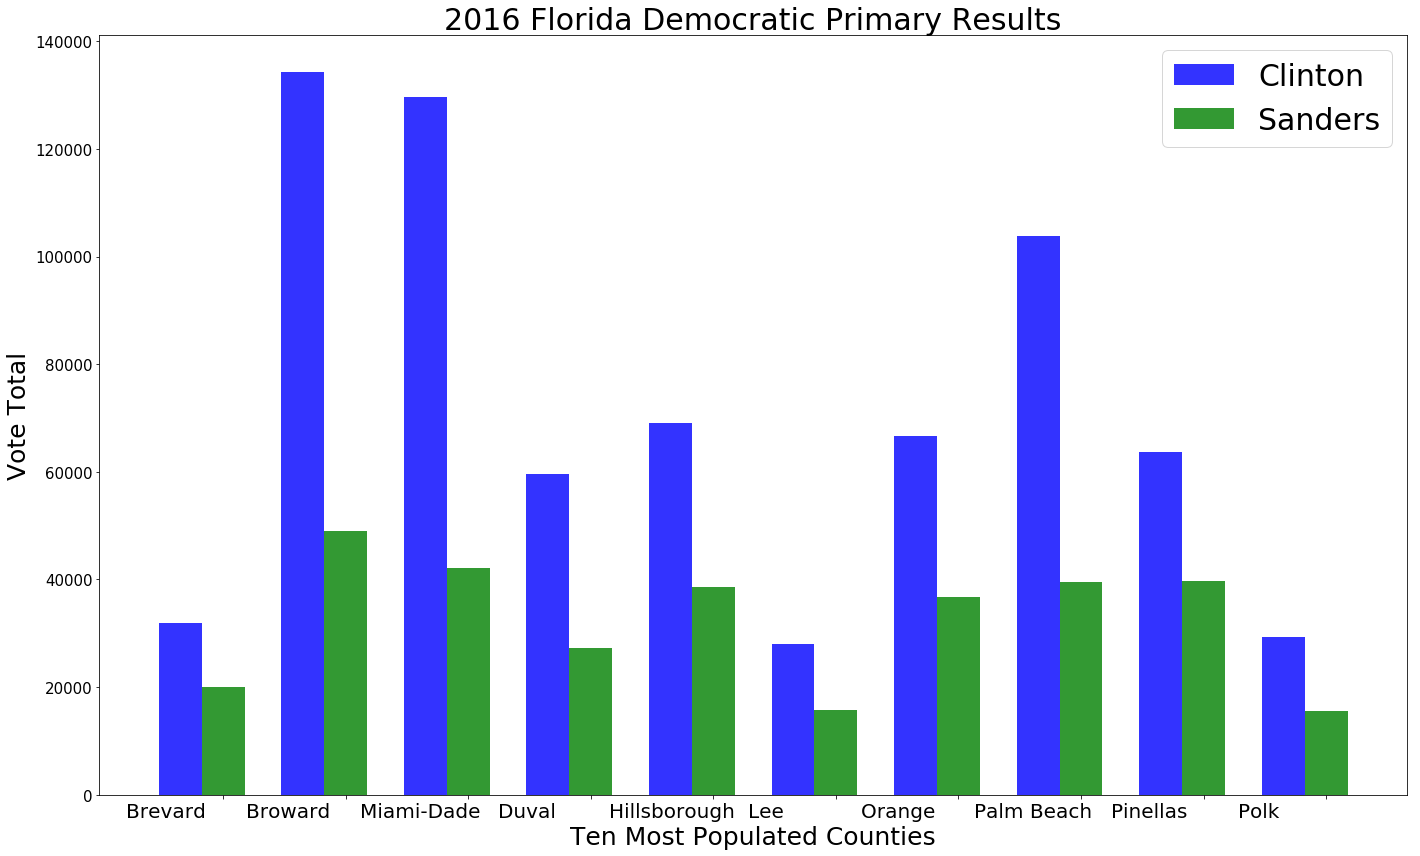

In [20]:
#Ten Most populated counties in Florida
n_groups = 10

fl_votes_clinton = cl_fl.iloc[[4, 5, 12, 15, 28, 35, 47, 49, 51, 52], 4]
fl_votes_sanders = sa_fl.iloc[[4, 5, 12, 15, 28, 35, 47, 49, 51, 52], 4]
fl_ten_high_pop_county = fl.iloc[[4, 5, 12, 15, 28, 35, 47, 49, 51, 52], 2]

# create plot
fig, ax = plt.subplots(figsize=(20,12))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, fl_votes_clinton, bar_width,
                                        alpha=opacity,
                                        color='b',
                                        label='Clinton')

rects2 = plt.bar(index + bar_width, fl_votes_sanders, bar_width,
                                                    alpha=opacity,
                                                    color='g',
                                                    label='Sanders')

plt.xlabel('Ten Most Populated Counties', fontsize=25)
plt.ylabel('Vote Total', fontsize=25)
plt.title('2016 Florida Democratic Primary Results', fontsize=30)
plt.xticks(index + bar_width, fl_ten_high_pop_county, fontsize=20)
plt.yticks(fontsize=15)
plt.legend(fontsize=30)

plt.tight_layout()
plt.show()

# Try plotting (vote count / rep or dem county population)
# Remove larger counties and create seperate graph 

In [21]:
fl_demog.head()

SUMLEV  STATE  COUNTY   STNAME         CTYNAME  YEAR  AGEGRP  TOT_POP  \
0      50     12       1  Florida  Alachua County     1       0   247336   
1      50     12       1  Florida  Alachua County     1       1    13068   
2      50     12       1  Florida  Alachua County     1       2    11739   
3      50     12       1  Florida  Alachua County     1       3    11669   
4      50     12       1  Florida  Alachua County     1       4    23589   

   TOT_MALE  TOT_FEMALE  WA_MALE  WA_FEMALE  BA_MALE  BA_FEMALE  IA_MALE  \
0    119786      127550    86242      90127    23663      27135      426   
1      6703        6365     3821       3569     2068       1977       27   
2      5913        5826     3505       3410     1783       1813       33   
3      5992        5677     3672       3389     1842       1777       32   
4     10942       12647     7324       8532     2629       2974       32   

   IA_FEMALE  AA_MALE  AA_FEMALE  NA_MALE  NA_FEMALE  TOM_MALE  TOM_FEMALE  \
0        414     6680       6865       82         73      2693        2936   
1         30      325        339        7          5       455         445   
2         29      260        284        4          3       328         287   
3         23      219        246        2          2       225         240   
4         37      638        715        9         13       310         376   

   WAC_MALE  WAC_FEMALE  BAC_MALE  BAC_FEMALE  IAC_MALE  IAC_FEMALE  AAC_MALE  \
0     88688       92730     25054       28621      1064        1196      7690   
1      4251        3993      2401        2265        71          93       445   
2      3818        3682      2015        2004        59          66       355   
3      3883        3616      1985        1924        76          66       281   
4      7604        8875      2786        3158        82         106       785   

   AAC_FEMALE  NAC_MALE  NAC_FEMALE  NH_MALE  NH_FEMALE  NHWA_MALE  \
0        7980       164         206   109756     116828      77369   
1         474        12          15     6066       5698       3298   
2         369         8          11     5337       5315       3028   
3         314         6          10     5496       5159       3260   
4         903        20          26     9618      11057       6159   

   NHWA_FEMALE  NHBA_MALE  NHBA_FEMALE  NHIA_MALE  NHIA_FEMALE  NHAA_MALE  \
0        80686      23106        26507        302          306       6572   
1         3046       2007         1917         18           14        322   
2         3005       1738         1767         25           16        257   
3         2959       1801         1734         22           11        215   
4         7119       2547         2895         17           27        624   

   NHAA_FEMALE  NHNA_MALE  NHNA_FEMALE  NHTOM_MALE  NHTOM_FEMALE  NHWAC_MALE  \
0         6733         73           60        2334          2536       79484   
1          332          7            2         414           387        3688   
2          283          4            1         285           243        3299   
3          241          2            2         196           212        3444   
4          676          7           13         264           327        6400   

   NHWAC_FEMALE  NHBAC_MALE  NHBAC_FEMALE  NHIAC_MALE  NHIAC_FEMALE  \
0         82922       24272         27737         836           959   
1          3416        2313          2164          56            64   
2          3234        1940          1932          45            46   
3          3160        1930          1865          54            45   
4          7416        2676          3051          54            80   

   NHAAC_MALE  NHAAC_FEMALE  NHNAC_MALE  NHNAC_FEMALE  H_MALE  H_FEMALE  \
0        7482          7738         149           177   10030     10722   
1         431           451          12            12     637       667   
2         340           350           7             8     576       511   
3         266           306           5  

In [22]:
flo_demog = fl_demog[(fl_demog.YEAR == 11) & (fl_demog.AGEGRP != 0) & (fl_demog.AGEGRP != 1) & (fl_demog.AGEGRP != 2) 
         & (fl_demog.AGEGRP != 3) & (fl_demog.AGEGRP != 4)]
flo_demog.reset_index(drop=True, inplace=True)
flo_demog.head()

SUMLEV  STATE  COUNTY   STNAME         CTYNAME  YEAR  AGEGRP  TOT_POP  \
0      50     12       1  Florida  Alachua County    11       5    42197   
1      50     12       1  Florida  Alachua County    11       6    24072   
2      50     12       1  Florida  Alachua County    11       7    18174   
3      50     12       1  Florida  Alachua County    11       8    16084   
4      50     12       1  Florida  Alachua County    11       9    13386   

   TOT_MALE  TOT_FEMALE  WA_MALE  WA_FEMALE  BA_MALE  BA_FEMALE  IA_MALE  \
0     20774       21423    15222      15688     2819       3485       34   
1     12066       12006     8073       7780     2670       2992       58   
2      9070        9104     6350       6025     1847       2165       43   
3      8048        8036     5631       5344     1681       1899       34   
4      6529        6857     4605       4505     1190       1517       26   

   IA_FEMALE  AA_MALE  AA_FEMALE  NA_MALE  NA_FEMALE  TOM_MALE  TOM_FEMALE  \
0         47     1891       1507       25         18       783         678   
1         33      896        859       20         10       349         332   
2         41      627        659       10          8       193         206   
3         36      561        577        8          4       133         176   
4         22      568        644        7          4       133         165   

   WAC_MALE  WAC_FEMALE  BAC_MALE  BAC_FEMALE  IAC_MALE  IAC_FEMALE  AAC_MALE  \
0     15938       16308      3276        3889       130         140      2222   
1      8374        8068      2837        3156       131         101      1067   
2      6519        6198      1921        2253        84          84       732   
3      5744        5491      1729        1967        69          77       635   
4      4715        4642      1242        1579        65          62       640   

   AAC_FEMALE  NAC_MALE  NAC_FEMALE  NH_MALE  NH_FEMALE  NHWA_MALE  \
0        1778        52          41    18044      18249      12749   
1        1022        37          31    10502      10565       6700   
2         769        23          28     7929       8042       5347   
3         674        19          24     7083       7060       4770   
4         736        12          19     5745       6107       3919   

   NHWA_FEMALE  NHBA_MALE  NHBA_FEMALE  NHIA_MALE  NHIA_FEMALE  NHAA_MALE  \
0        12746       2672         3355         25           37       1877   
1         6538       2566         2875         32           29        888   
2         5100       1784         2095         20           30        617   
3         4474       1624         1850         21           28        551   
4         3843       1140         1478         11           13        563   

   NHAA_FEMALE  NHNA_MALE  NHNA_FEMALE  NHTOM_MALE  NHTOM_FEMALE  NHWAC_MALE  \
0         1462         15           17         706           632       13397   
1          844         10            4         306           275        6961   
2          641          6            4         155           172        5480   
3          566          7            1         110           141        4863   
4          634          2            4         110           135        4009   

   NHWAC_FEMALE  NHBAC_MALE  NHBAC_FEMALE  NHIAC_MALE  NHIAC_FEMALE  \
0         13322        3069          3723         100           116   
1          6770        2705          2998          90            77   
2          5244        1833          2154          50            64   
3          4590        1656          1893          48            59   
4          3953        1174          1519          44            45   

   NHAAC_MALE  NHAAC_FEMALE  NHNAC_MALE  NHNAC_FEMALE  H_MALE  H_FEMALE  \
0        2192          1724          40            38    2730      3174   
1        1053           996          26            24    1564      1441   
2         717           748          17            20    1141      1062   
3         621           660          17  

# Illinois - Semi Closed Primary 

In Illinois, a voter states his or her affiliation with a political party at the polling place in order to vote in that party's primary. Because the voter does not have to register partisan affiliation in advance, Illinois' primaries are considered open.

In [23]:
ill

County  Clinton Clinton Votes  Sanders Sanders Votes
0          Adams  Clinton         1,784  Sanders         1,654
1      Alexander  Clinton           770  Sanders           434
2           Bond  Clinton           719  Sanders           855
3          Boone  Clinton         1,958  Sanders         2,777
4          Brown  Clinton           160  Sanders           156
5         Bureau  Clinton         1,523  Sanders         1,860
6        Calhoun  Clinton           447  Sanders           504
7        Carroll  Clinton           625  Sanders           642
8           Cass  Clinton           504  Sanders           539
9      Champaign  Clinton        10,721  Sanders        21,440
10     Christian  Clinton         1,401  Sanders         1,529
11         Clark  Clinton           562  Sanders           664
12          Clay  Clinton           378  Sanders           439
13       Clinton  Clinton           908  Sanders         1,270
14         Coles  Clinton         1,714  Sanders         2,527
15          Cook  Clinton       633,300  Sanders       536,805
16      Crawford  Clinton           609  Sanders           585
17    Cumberland  Clinton           364  Sanders           518
18        Dekalb  Clinton         4,146  Sanders         8,330
19       De Witt  Clinton           561  Sanders           660
20       Douglas  Clinton           484  Sanders           643
21        DuPage  Clinton        59,798  Sanders        66,163
22         Edgar  Clinton           446  Sanders           468
23       Edwards  Clinton           143  Sanders           148
24     Effingham  Clinton           868  Sanders         1,248
25       Fayette  Clinton           616  Sanders           643
26          Ford  Clinton           288  Sanders           438
27      Franklin  Clinton         2,179  Sanders         2,782
28        Fulton  Clinton         2,153  Sanders         2,540
29      Gallatin  Clinton           531  Sanders           663
30        Greene  Clinton           507  Sanders           535
31        Grundy  Clinton         2,053  Sanders         3,106
32      Hamilton  Clinton           418  Sanders           485
33       Hancock  Clinton           631  Sanders           468
34        Hardin  Clinton           162  Sanders           222
35     Henderson  Clinton           339  Sanders           296
36         Henry  Clinton         2,159  Sanders         2,065
37      Iroquois  Clinton           544  Sanders           881
38       Jackson  Clinton         2,842  Sanders         4,713
39        Jasper  Clinton           328  Sanders           434
40     Jefferson  Clinton         1,678  Sanders         1,777
41        Jersey  Clinton           857  Sanders         1,071
42    Jo Daviess  Clinton         1,320  Sanders         1,226
43       Johnson  Clinton           361  Sanders           420
44          Kane  Clinton        23,505  Sanders        30,234
45      Kankakee  Clinton         4,902  Sanders         5,761
46       Kendall  Clinton         5,611  Sanders         7,841
47          Knox  Clinton         2,957  Sanders         3,222
48          Lake  Clinton        50,271  Sanders        44,823
49       LaSalle  Clinton         5,279  Sanders         6,746
50      Lawrence  Clinton           417  Sanders           431
51           Lee  Clinton         1,295  Sanders         1,961
52    Livingston  Clinton           832  Sanders         1,054
53         Logan  Clinton           739  Sanders           974
54     McDonough  Clinton         1,054  Sanders         1,471
55       McHenry  Clinton        13,221  Sanders        20,702
56        McLean  Clinton         7,726  Sanders        13,008
57         Macon  Clinton         5,958  Sanders         4,995
58      Macoupin  Clinton         2,783  Sanders         3,537
59       Madison  Clinton        15,572  Sanders        19,463
60        Marion  Clinton         1,630  Sanders         1,708
61      Marshall  Clinton           569  Sanders           586
62         Mason  Clinton           680  

In [24]:
ill = ill.drop(columns=['Clinton','Sanders'])

In [25]:
ill['Clinton Votes'] = ill['Clinton Votes'].map(rm_comma).astype(int)
ill['Sanders Votes'] = ill['Sanders Votes'].map(rm_comma).astype(int)
ill.dtypes

County           object
Clinton Votes     int64
Sanders Votes     int64
dtype: object

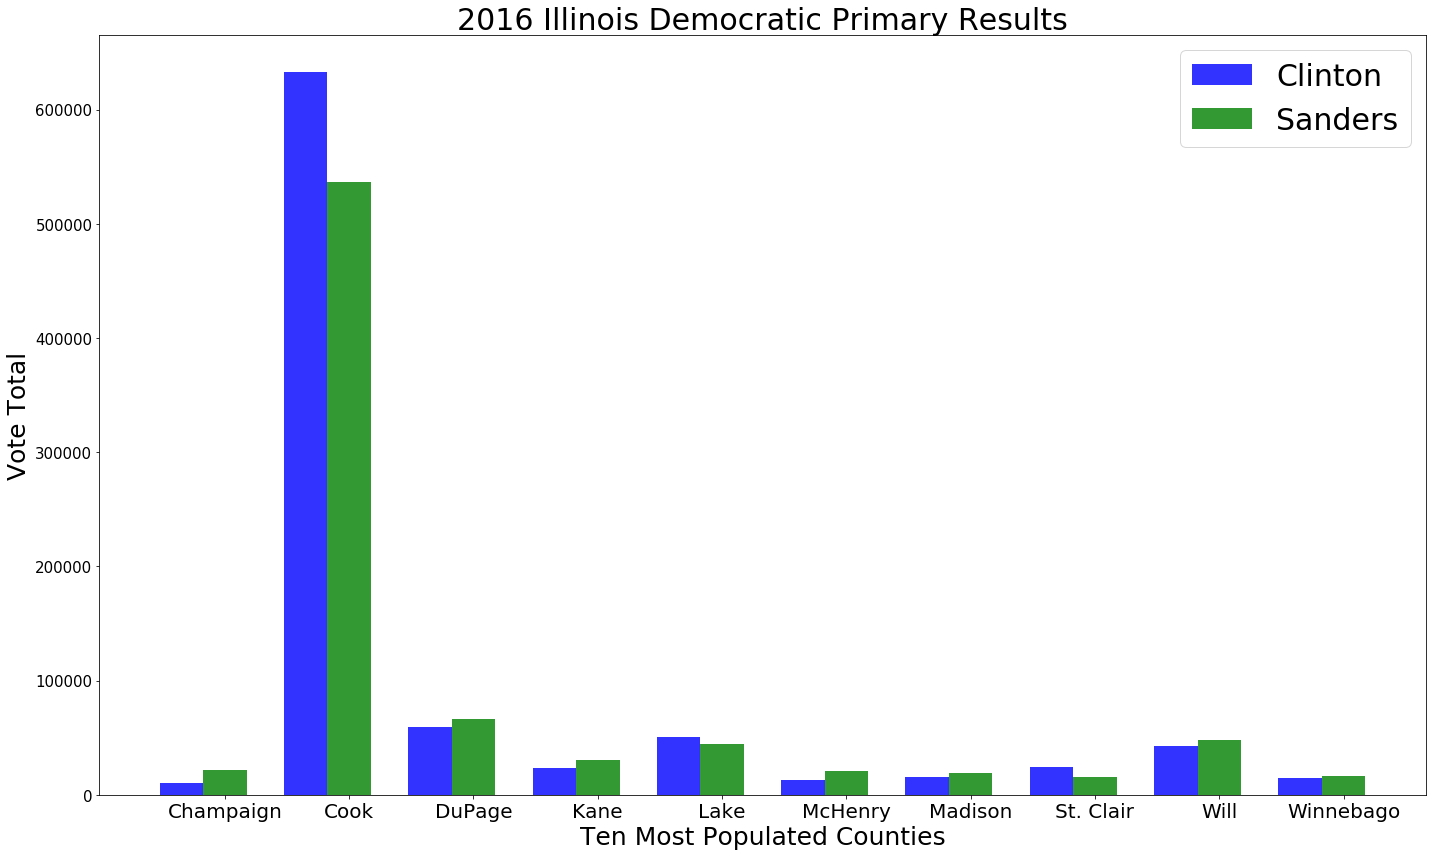

In [26]:
#Ten Most populated counties in Illinois
n_groups = 10

ill_votes_clinton = ill.iloc[[9, 15, 21, 44, 48, 55, 59, 81, 98, 100], 1]
ill_votes_sanders = ill.iloc[[9, 15, 21, 44, 48, 55, 59, 81, 98, 100], 2]
ill_ten_high_pop_county = ill.iloc[[9, 15, 21, 44, 48, 55, 59, 81, 98, 100], 0]

# create plot
fig, ax = plt.subplots(figsize=(20,12))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, ill_votes_clinton, bar_width,
                                        alpha=opacity,
                                        color='b',
                                        label='Clinton')

rects2 = plt.bar(index + bar_width, ill_votes_sanders, bar_width,
                                                    alpha=opacity,
                                                    color='g',
                                                    label='Sanders')

plt.xlabel('Ten Most Populated Counties', fontsize=25)
plt.ylabel('Vote Total', fontsize=25)
plt.title('2016 Illinois Democratic Primary Results', fontsize=30)
plt.xticks(index + bar_width, ill_ten_high_pop_county, fontsize=20)
plt.yticks(fontsize=15)
plt.legend(fontsize=30)

plt.tight_layout()
plt.show()

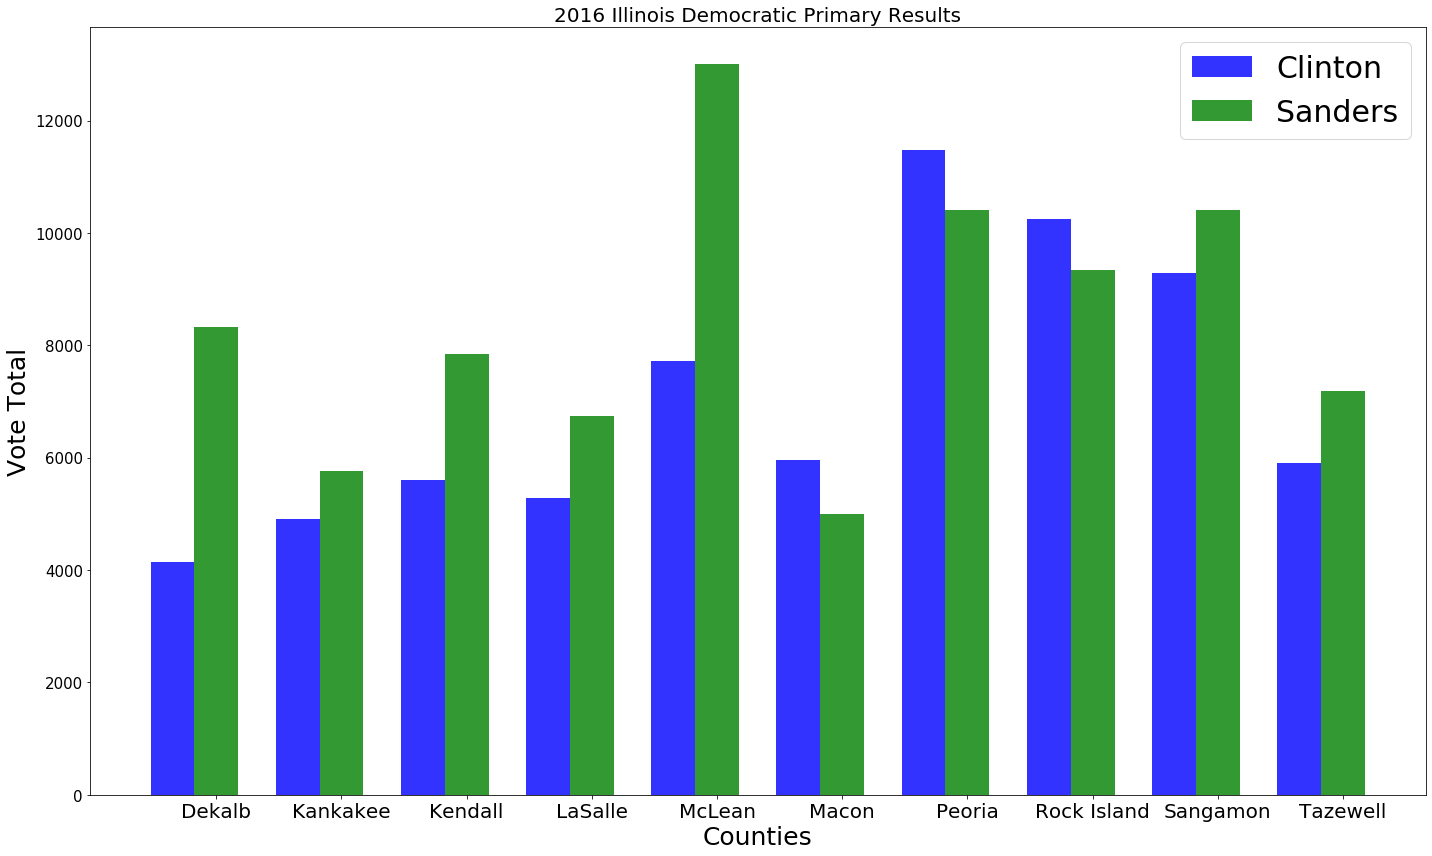

In [27]:
# Eleven through 20 of most populated counties in Illinois

n_groups = 10

ill2_votes_clinton = ill.iloc[[18, 45, 46, 49, 56, 57, 71, 80, 83, 89], 1]
ill2_votes_sanders = ill.iloc[[18, 45, 46, 49, 56, 57, 71, 80, 83, 89], 2]
ill2_ten_high_pop_county = ill.iloc[[18, 45, 46, 49, 56, 57, 71, 80, 83, 89], 0]

# create plot
fig, ax = plt.subplots(figsize=(20,12))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, ill2_votes_clinton, bar_width,
                                        alpha=opacity,
                                        color='b',
                                        label='Clinton')

rects2 = plt.bar(index + bar_width, ill2_votes_sanders, bar_width,
                                                    alpha=opacity,
                                                    color='g',
                                                    label='Sanders')

plt.xlabel('Counties', fontsize=25)
plt.ylabel('Vote Total', fontsize=25)
plt.title('2016 Illinois Democratic Primary Results', fontsize=20)
plt.xticks(index + bar_width, ill2_ten_high_pop_county, fontsize=20)
plt.yticks(fontsize=15)
plt.legend(fontsize=30)

plt.tight_layout()
plt.show()

In [28]:
ill_demog.head()

SUMLEV  STATE  COUNTY    STNAME       CTYNAME  YEAR  AGEGRP  TOT_POP  \
0      50     17       1  Illinois  Adams County     1       0    67103   
1      50     17       1  Illinois  Adams County     1       1     4232   
2      50     17       1  Illinois  Adams County     1       2     4240   
3      50     17       1  Illinois  Adams County     1       3     4264   
4      50     17       1  Illinois  Adams County     1       4     4620   

   TOT_MALE  TOT_FEMALE  WA_MALE  WA_FEMALE  BA_MALE  BA_FEMALE  IA_MALE  \
0     32667       34436    30654      32469     1205       1152       64   
1      2146        2086     1864       1845      119        104        6   
2      2189        2051     1963       1815      112        116        5   
3      2187        2077     2013       1899       90        105        7   
4      2375        2245     2190       2056      122        119        1   

   IA_FEMALE  AA_MALE  AA_FEMALE  NA_MALE  NA_FEMALE  TOM_MALE  TOM_FEMALE  \
0         55      213        239        5          7       526         514   
1          3       23         20        0          2       134         112   
2          4       15         13        0          1        94         102   
3          1       11         17        0          0        66          55   
4          5       12          8        0          0        50          57   

   WAC_MALE  WAC_FEMALE  BAC_MALE  BAC_FEMALE  IAC_MALE  IAC_FEMALE  AAC_MALE  \
0     31161       32969      1562        1505       198         177       279   
1      1995        1952       232         196        23          15        35   
2      2055        1917       185         196        19          14        26   
3      2077        1954       140         147        19           5        18   
4      2237        2113       160         161         9          13        20   

   AAC_FEMALE  NAC_MALE  NAC_FEMALE  NH_MALE  NH_FEMALE  NHWA_MALE  \
0         309        24          22    32297      34030      30350   
1          38         5           5     2102       2050       1829   
2          30         2           4     2146       1993       1932   
3          26         3           2     2148       2040       1986   
4          15         2           1     2339       2199       2162   

   NHWA_FEMALE  NHBA_MALE  NHBA_FEMALE  NHIA_MALE  NHIA_FEMALE  NHAA_MALE  \
0        32132       1185         1123         53           47        199   
1         1815        117          101          5            3         22   
2         1775        109          110          3            1         15   
3         1867         87          103          4            1          8   
4         2015        119          116          1            5         10   

   NHAA_FEMALE  NHNA_MALE  NHNA_FEMALE  NHTOM_MALE  NHTOM_FEMALE  NHWAC_MALE  \
0          234          5            7         505           487       30837   
1           20          0            2         129           109        1955   
2           13          0            1          87            93        2017   
3           14          0            0          63            55        2047   
4            8          0            0          47            55        2207   

   NHWAC_FEMALE  NHBAC_MALE  NHBAC_FEMALE  NHIAC_MALE  NHIAC_FEMALE  \
0         32606        1529          1458         178           155   
1          1919         226           192          21            12   
2          1868         177           184          15             7   
3          1922         136           145          14             5   
4          2070         155           156           7            13   

   NHAAC_MALE  NHAAC_FEMALE  NHNAC_MALE  NHNAC_FEMALE  H_MALE  H_FEMALE  \
0         265           303          23            22     370       406   
1          34            38           5             5      44        36   
2          26            29           2             4      43        58   
3          15            23           3        

In [29]:
illi_demog = ill_demog[(ill_demog.YEAR == 11) & (ill_demog.AGEGRP != 0) & (ill_demog.AGEGRP != 1) & (ill_demog.AGEGRP != 2) 
         & (ill_demog.AGEGRP != 3) & (ill_demog.AGEGRP != 4)]
illi_demog.reset_index(drop=True, inplace=True)
ill_demog.head()

SUMLEV  STATE  COUNTY    STNAME       CTYNAME  YEAR  AGEGRP  TOT_POP  \
0      50     17       1  Illinois  Adams County     1       0    67103   
1      50     17       1  Illinois  Adams County     1       1     4232   
2      50     17       1  Illinois  Adams County     1       2     4240   
3      50     17       1  Illinois  Adams County     1       3     4264   
4      50     17       1  Illinois  Adams County     1       4     4620   

   TOT_MALE  TOT_FEMALE  WA_MALE  WA_FEMALE  BA_MALE  BA_FEMALE  IA_MALE  \
0     32667       34436    30654      32469     1205       1152       64   
1      2146        2086     1864       1845      119        104        6   
2      2189        2051     1963       1815      112        116        5   
3      2187        2077     2013       1899       90        105        7   
4      2375        2245     2190       2056      122        119        1   

   IA_FEMALE  AA_MALE  AA_FEMALE  NA_MALE  NA_FEMALE  TOM_MALE  TOM_FEMALE  \
0         55      213        239        5          7       526         514   
1          3       23         20        0          2       134         112   
2          4       15         13        0          1        94         102   
3          1       11         17        0          0        66          55   
4          5       12          8        0          0        50          57   

   WAC_MALE  WAC_FEMALE  BAC_MALE  BAC_FEMALE  IAC_MALE  IAC_FEMALE  AAC_MALE  \
0     31161       32969      1562        1505       198         177       279   
1      1995        1952       232         196        23          15        35   
2      2055        1917       185         196        19          14        26   
3      2077        1954       140         147        19           5        18   
4      2237        2113       160         161         9          13        20   

   AAC_FEMALE  NAC_MALE  NAC_FEMALE  NH_MALE  NH_FEMALE  NHWA_MALE  \
0         309        24          22    32297      34030      30350   
1          38         5           5     2102       2050       1829   
2          30         2           4     2146       1993       1932   
3          26         3           2     2148       2040       1986   
4          15         2           1     2339       2199       2162   

   NHWA_FEMALE  NHBA_MALE  NHBA_FEMALE  NHIA_MALE  NHIA_FEMALE  NHAA_MALE  \
0        32132       1185         1123         53           47        199   
1         1815        117          101          5            3         22   
2         1775        109          110          3            1         15   
3         1867         87          103          4            1          8   
4         2015        119          116          1            5         10   

   NHAA_FEMALE  NHNA_MALE  NHNA_FEMALE  NHTOM_MALE  NHTOM_FEMALE  NHWAC_MALE  \
0          234          5            7         505           487       30837   
1           20          0            2         129           109        1955   
2           13          0            1          87            93        2017   
3           14          0            0          63            55        2047   
4            8          0            0          47            55        2207   

   NHWAC_FEMALE  NHBAC_MALE  NHBAC_FEMALE  NHIAC_MALE  NHIAC_FEMALE  \
0         32606        1529          1458         178           155   
1          1919         226           192          21            12   
2          1868         177           184          15             7   
3          1922         136           145          14             5   
4          2070         155           156           7            13   

   NHAAC_MALE  NHAAC_FEMALE  NHNAC_MALE  NHNAC_FEMALE  H_MALE  H_FEMALE  \
0         265           303          23            22     370       406   
1          34            38           5             5      44        36   
2          26            29           2             4      43        58   
3          15            23           3        

# Ohio - Open Primary 

Ohio law provides for open primaries, meaning voters do not have to register with a party to participate in its primary. Voters select the ballot of the party whose primary they wish to vote in at the polling place.

In [30]:
oh

County  Clinton Clinton Votes  Sanders Sanders Votes
0        Adams  Clinton           877  Sanders           638
1        Allen  Clinton         3,670  Sanders         2,730
2      Ashland  Clinton         1,451  Sanders         1,465
3    Ashtabula  Clinton         5,320  Sanders         4,256
4       Athens  Clinton         3,533  Sanders         5,663
5     Auglaize  Clinton         1,031  Sanders           952
6      Belmont  Clinton         3,982  Sanders         3,263
7      Belmont  Clinton         1,562  Sanders         1,067
8       Butler  Clinton        12,874  Sanders        11,102
9      Carroll  Clinton         1,084  Sanders           976
10   Champaign  Clinton         1,226  Sanders         1,099
11       Clark  Clinton         7,107  Sanders         4,905
12    Clermont  Clinton         5,642  Sanders         5,710
13     Clinton  Clinton           909  Sanders           942
14  Columbiana  Clinton         4,106  Sanders         3,573
15   Coshocton  Clinton         1,358  Sanders         1,128
16    Crawford  Clinton         1,344  Sanders         1,141
17    Cuyahoga  Clinton       125,914  Sanders        72,297
18       Darke  Clinton         1,246  Sanders           999
19    Defiance  Clinton         1,507  Sanders         1,435
20    Delaware  Clinton         9,552  Sanders         6,891
21        Erie  Clinton         5,449  Sanders         4,299
22   Fairfield  Clinton         6,408  Sanders         5,074
23     Fayette  Clinton           760  Sanders           533
24    Franklin  Clinton        84,654  Sanders        67,855
25      Fulton  Clinton         1,480  Sanders         1,528
26      Gallia  Clinton           945  Sanders           966
27      Geauga  Clinton         4,171  Sanders         3,516
28      Greene  Clinton         6,672  Sanders         6,759
29    Guernsey  Clinton         1,440  Sanders         1,228
30    Hamilton  Clinton        57,687  Sanders        38,956
31     Hancock  Clinton         2,062  Sanders         2,490
32      Hardin  Clinton           771  Sanders           669
33    Harrison  Clinton           818  Sanders           674
34       Henry  Clinton           977  Sanders           952
35    Highland  Clinton         1,119  Sanders           873
36     Hocking  Clinton         1,204  Sanders         1,060
37      Holmes  Clinton           561  Sanders           558
38       Huron  Clinton         2,036  Sanders         1,907
39     Jackson  Clinton         1,010  Sanders           694
40   Jefferson  Clinton         4,328  Sanders         3,353
41        Knox  Clinton         1,902  Sanders         1,987
42        Lake  Clinton        12,506  Sanders        10,351
43    Lawrence  Clinton         2,654  Sanders         1,994
44     Licking  Clinton         6,785  Sanders         5,849
45       Logan  Clinton         1,012  Sanders           998
46      Lorain  Clinton        21,144  Sanders        16,154
47       Lucas  Clinton        32,137  Sanders        24,111
48     Madison  Clinton         1,225  Sanders           923
49    Mahoning  Clinton        21,000  Sanders        14,066
50      Marion  Clinton         2,585  Sanders         1,909
51      Medina  Clinton         7,913  Sanders         6,888
52       Meigs  Clinton           800  Sanders           757
53      Mercer  Clinton         1,037  Sanders           860
54       Miami  Clinton         3,155  Sanders         2,706
55      Monroe  Clinton         1,191  Sanders         1,138
56  Montgomery  Clinton        33,352  Sanders        22,538
57      Morgan  Clinton           566  Sanders           430
58      Morrow  Clinton         1,164  Sanders         1,035
59   Muskingum  Clinton         3,066  Sanders         2,299
60       Noble  Clinton           522  Sanders           404
61      Ottawa  Clinton         2,566  Sanders         2,012
62    Paulding  Clinton           723  Sanders           540
63       Perry  Clinton         1,465  Sanders         1,070
64    Pickaway  Clinton         2,097  Sand

In [31]:
oh = oh.drop(columns=['Clinton','Sanders'])

In [32]:
oh.head()

County Clinton Votes Sanders Votes
0      Adams           877           638
1      Allen         3,670         2,730
2    Ashland         1,451         1,465
3  Ashtabula         5,320         4,256
4     Athens         3,533         5,663

In [33]:
oh['Clinton Votes'] = oh['Clinton Votes'].map(rm_comma).astype(int)
oh['Sanders Votes'] = oh['Sanders Votes'].map(rm_comma).astype(int)
oh.dtypes

County           object
Clinton Votes     int64
Sanders Votes     int64
dtype: object

In [34]:
oh.head()

County  Clinton Votes  Sanders Votes
0      Adams            877            638
1      Allen           3670           2730
2    Ashland           1451           1465
3  Ashtabula           5320           4256
4     Athens           3533           5663

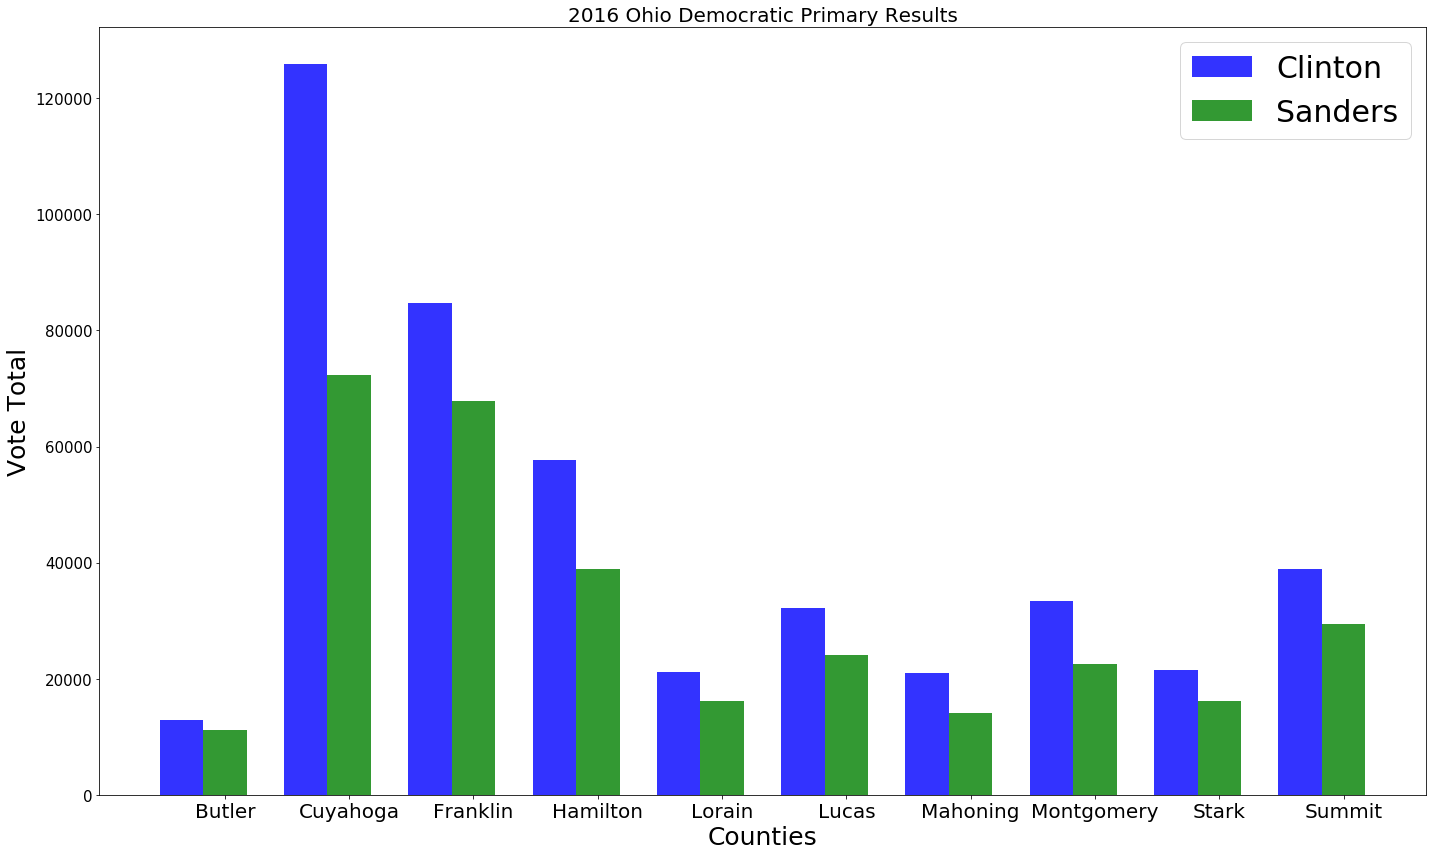

In [35]:
#Ten Most populated counties in Ohio
n_groups = 10

oh_votes_clinton = oh.iloc[[8, 17, 24, 30, 46, 47, 49, 56, 75, 76], 1]
oh_votes_sanders = oh.iloc[[8, 17, 24, 30, 46, 47, 49, 56, 75, 76], 2]
ten_high_pop_county = oh.iloc[[8, 17, 24, 30, 46, 47, 49, 56, 75, 76], 0]

# create plot
fig, ax = plt.subplots(figsize=(20,12))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, oh_votes_clinton, bar_width,
                                        alpha=opacity,
                                        color='b',
                                        label='Clinton')

rects2 = plt.bar(index + bar_width, oh_votes_sanders, bar_width,
                                                    alpha=opacity,
                                                    color='g',
                                                    label='Sanders')

plt.xlabel('Counties', fontsize=25)
plt.ylabel('Vote Total', fontsize=25)
plt.title('2016 Ohio Democratic Primary Results', fontsize=20)
plt.xticks(index + bar_width, ten_high_pop_county, fontsize=20)
plt.yticks(fontsize=15)
plt.legend(fontsize=30)

plt.tight_layout()
plt.show()

# Try plotting (vote count / rep or dem county population)
# Remove larger counties and create seperate graph 

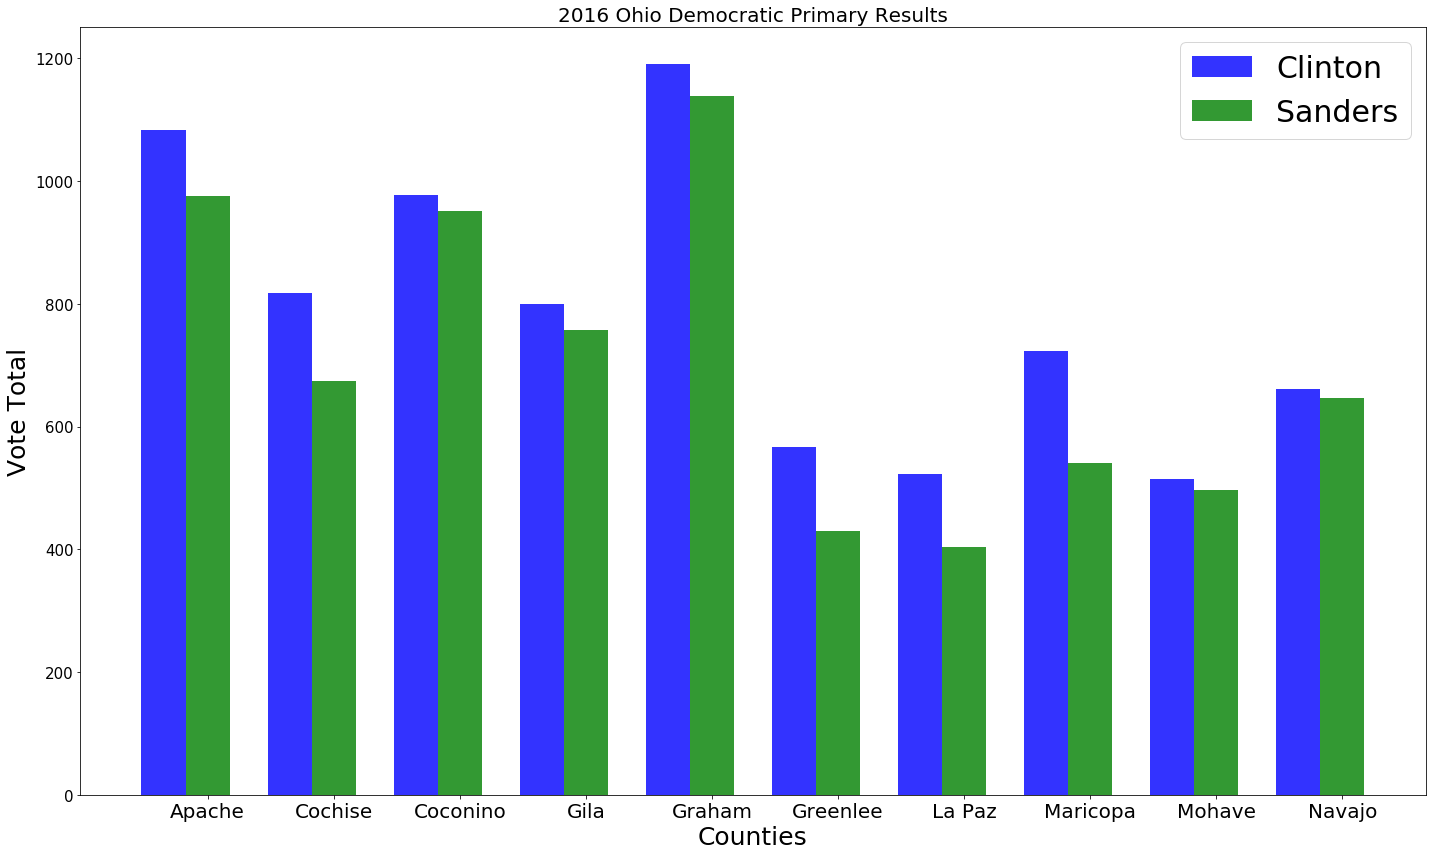

In [36]:
#Ten least populated counties in Ohio 
n_groups = 10

oh_votes_clinton_b10 = oh.iloc[[9, 33, 34, 52, 55, 57, 60, 62, 81, 87], 1]
oh_votes_sanders_b10 = oh.iloc[[9, 33, 34, 52, 55, 57, 60, 62, 81, 87], 2]
ten_low_pop_county = oh.iloc[[9, 33, 34, 52, 55, 57, 60, 62, 81, 87], 0]

# create plot
fig, ax = plt.subplots(figsize=(20,12))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, oh_votes_clinton_b10, bar_width,
                                        alpha=opacity,
                                        color='b',
                                        label='Clinton')

rects2 = plt.bar(index + bar_width, oh_votes_sanders_b10, bar_width,
                                                    alpha=opacity,
                                                    color='g',
                                                    label='Sanders')

plt.xlabel('Counties', fontsize=25)
plt.ylabel('Vote Total', fontsize=25)
plt.title('2016 Ohio Democratic Primary Results', fontsize=20)
plt.xticks(index + bar_width, az['County'], fontsize=20)
plt.yticks(fontsize=15)
plt.legend(fontsize=30)

plt.tight_layout()
plt.show()

In [39]:
oh_demog.head()

SUMLEV  STATE  COUNTY STNAME       CTYNAME  YEAR  AGEGRP  TOT_POP  \
0      50     39       1   Ohio  Adams County     1       0    28550   
1      50     39       1   Ohio  Adams County     1       1     1924   
2      50     39       1   Ohio  Adams County     1       2     2000   
3      50     39       1   Ohio  Adams County     1       3     1980   
4      50     39       1   Ohio  Adams County     1       4     1964   

   TOT_MALE  TOT_FEMALE  WA_MALE  WA_FEMALE  BA_MALE  BA_FEMALE  IA_MALE  \
0     14095       14455    13800      14165       53         36       56   
1      1001         923      974        902        3          4        2   
2      1038         962     1014        946        5          3        1   
3       938        1042      912       1020        2          4        5   
4       992         972      970        943        8          2        3   

   IA_FEMALE  AA_MALE  AA_FEMALE  NA_MALE  NA_FEMALE  TOM_MALE  TOM_FEMALE  \
0         56       11         23        1          1       174         174   
1          1        0          1        0          0        22          15   
2          3        0          2        0          0        18           8   
3          1        0          1        0          0        19          16   
4          2        0          3        0          0        11          22   

   WAC_MALE  WAC_FEMALE  BAC_MALE  BAC_FEMALE  IAC_MALE  IAC_FEMALE  AAC_MALE  \
0     13971       14335        84          62       186         191        29   
1       996         917        16          14        11           4         0   
2      1032         953        10           4        10           8         3   
3       931        1036         4           6        17          12         5   
4       981         965        10           7         9          18         3   

   AAC_FEMALE  NAC_MALE  NAC_FEMALE  NH_MALE  NH_FEMALE  NHWA_MALE  \
0          39         3           3    13966      14341      13676   
1           2         0           1      983        909        957   
2           5         1           0     1024        947       1001   
3           4         0           0      922       1027        896   
4           4         0           0      982        962        960   

   NHWA_FEMALE  NHBA_MALE  NHBA_FEMALE  NHIA_MALE  NHIA_FEMALE  NHAA_MALE  \
0        14063         52           34         55           50         10   
1          889          3            4          2            1          0   
2          932          5            3          1            3          0   
3         1006          2            3          5            1          0   
4          935          8            2          3            1          0   

   NHAA_FEMALE  NHNA_MALE  NHNA_FEMALE  NHTOM_MALE  NHTOM_FEMALE  NHWAC_MALE  \
0           22          1            1         172           171       13845   
1            1          0            0          21            14         978   
2            1          0            0          17             8        1018   
3            1          0            0          19            16         915   
4            3          0            0          11            21         971   

   NHWAC_FEMALE  NHBAC_MALE  NHBAC_FEMALE  NHIAC_MALE  NHIAC_FEMALE  \
0         14230          83            59         183           183   
1           903          16            14          10             3   
2           939          10             4           9             8   
3          1022           4             5          17            12   
4           956          10             6           9            17   

   NHAAC_MALE  NHAAC_FEMALE  NHNAC_MALE  NHNAC_FEMALE  H_MALE  H_FEMALE  \
0          28            37           3             3     129       114   
1           0             2           0             1      18        14   
2           3             4           1             0      14        15   
3           5             4           0             0      16    

In [40]:
ohio_demog = oh_demog[(oh_demog.YEAR == 11) & (oh_demog.AGEGRP != 0) & (oh_demog.AGEGRP != 1) & (oh_demog.AGEGRP != 2) 
         & (oh_demog.AGEGRP != 3) & (oh_demog.AGEGRP != 4)]
ohio_demog.reset_index(drop=True, inplace=True)
ohio_demog.head()

SUMLEV  STATE  COUNTY STNAME       CTYNAME  YEAR  AGEGRP  TOT_POP  \
0      50     39       1   Ohio  Adams County    11       5     1426   
1      50     39       1   Ohio  Adams County    11       6     1630   
2      50     39       1   Ohio  Adams County    11       7     1434   
3      50     39       1   Ohio  Adams County    11       8     1521   
4      50     39       1   Ohio  Adams County    11       9     1713   

   TOT_MALE  TOT_FEMALE  WA_MALE  WA_FEMALE  BA_MALE  BA_FEMALE  IA_MALE  \
0       709         717      683        698        7          4        5   
1       805         825      780        801        7          2        6   
2       697         737      676        721        3          3        8   
3       744         777      725        762        6          6        2   
4       842         871      827        828        2          1        6   

   IA_FEMALE  AA_MALE  AA_FEMALE  NA_MALE  NA_FEMALE  TOM_MALE  TOM_FEMALE  \
0          4        0          2        1          0        13           9   
1          4        0          1        0          0        12          17   
2          2        2          1        0          0         8          10   
3          0        5          2        0          0         6           7   
4          3        1         30        0          0         6           9   

   WAC_MALE  WAC_FEMALE  BAC_MALE  BAC_FEMALE  IAC_MALE  IAC_FEMALE  AAC_MALE  \
0       696         706        12           9        11           9         0   
1       792         817         9           9        15          14         1   
2       684         731         5           6        13           9         3   
3       731         769         8           8         6           6         5   
4       833         837         3           3        11           9         1   

   AAC_FEMALE  NAC_MALE  NAC_FEMALE  NH_MALE  NH_FEMALE  NHWA_MALE  \
0           2         3           0      697        710        671   
1           4         0           0      788        809        767   
2           1         0           0      691        733        670   
3           3         0           0      733        774        714   
4          31         0           0      828        863        816   

   NHWA_FEMALE  NHBA_MALE  NHBA_FEMALE  NHIA_MALE  NHIA_FEMALE  NHAA_MALE  \
0          692          7            4          5            3          0   
1          787          7            2          2            3          0   
2          717          3            3          8            2          2   
3          760          6            5          2            0          5   
4          821          2            1          4            3          0   

   NHAA_FEMALE  NHNA_MALE  NHNA_FEMALE  NHTOM_MALE  NHTOM_FEMALE  NHWAC_MALE  \
0            2          1            0          13             9         684   
1            1          0            0          12            16         779   
2            1          0            0           8            10         678   
3            2          0            0           6             7         720   
4           30          0            0           6             8         822   

   NHWAC_FEMALE  NHBAC_MALE  NHBAC_FEMALE  NHIAC_MALE  NHIAC_FEMALE  \
0           700          12             9          11             8   
1           802           9             8          11            13   
2           727           5             6          13             9   
3           767           8             7           6             6   
4           829           3             3           9             9   

   NHAAC_MALE  NHAAC_FEMALE  NHNAC_MALE  NHNAC_FEMALE  H_MALE  H_FEMALE  \
0           0             2           3             0      12         7   
1           1             4           0             0      17        16   
2           3             1           0             0       6         4   
3           5             3           0             0      11    

# Now let's look at some polling data. 

In [53]:
polls = pd.read_csv('../Datasets/dem_primary.csv')
polls.head(20)

question_id  poll_id  cycle     state  pollster_id  \
0        119743    64748   2020  Michigan          317   
1        119743    64748   2020  Michigan          317   
2        119743    64748   2020  Michigan          317   
3        119743    64748   2020  Michigan          317   
4        119743    64748   2020  Michigan          317   
5        119743    64748   2020  Michigan          317   
6        119743    64748   2020  Michigan          317   
7        119758    64753   2020  Illinois         1230   
8        119758    64753   2020  Illinois         1230   
9        119758    64753   2020  Illinois         1230   
10       119803    64763   2020  Michigan         1166   
11       119803    64763   2020  Michigan         1166   
12       119803    64763   2020  Michigan         1166   
13       119803    64763   2020  Michigan         1166   
14       119803    64763   2020  Michigan         1166   
15       119803    64763   2020  Michigan         1166   
16       119800    64761   2020  Michigan         1551   
17       119800    64761   2020  Michigan         1551   
18       119800    64761   2020  Michigan         1551   
19       119783    64754   2020   Florida         1539   

                              pollster sponsor_ids                 sponsors  \
0   Mitchell Research & Communications         NaN                      NaN   
1   Mitchell Research & Communications         NaN                      NaN   
2   Mitchell Research & Communications         NaN                      NaN   
3   Mitchell Research & Communications         NaN                      NaN   
4   Mitchell Research & Communications         NaN                      NaN   
5   Mitchell Research & Communications         NaN                      NaN   
6   Mitchell Research & Communications         NaN                      NaN   
7                          Ogden & Fry        1249  Northwest Side GOP Club   
8                          Ogden & Fry        1249  Northwest Side GOP Club   
9                          Ogden & Fry        1249  Northwest Side GOP Club   
10                      Target Insyght         NaN                      NaN   
11                      Target Insyght         NaN                      NaN   
12                      Target Insyght         NaN                      NaN   
13                      Target Insyght         NaN                      NaN   
14                      Target Insyght         NaN                      NaN   
15                      Target Insyght         NaN                      NaN   
16     Concord Public Opinion Partners        1240        The Welcome Party   
17     Concord Public Opinion Partners        1240        The Welcome Party   
18     Concord Public Opinion Partners        1240        The Welcome Party   
19               Point Blank Political         NaN                      NaN   

                          display_name  pollster_rating_id  \
0   Mitchell Research & Communications               213.0   
1   Mitchell Research & Communications               213.0   
2   Mitchell Research & Communications               213.0   
3   Mitchell Research & Communications               213.0   
4   Mitchell Research & Communications               213.0   
5   Mitchell Research & Communications               213.0   
6   Mitchell Research & Communications               213.0   
7                          Ogden & Fry               425.0   
8                          Ogden & Fry               425.0   
9                          Ogden & Fry               425.0   
10                      Target Insyght               330.0   
11                      Target Insyght               330.0   
12                      Target Insyght               330.0   
13                      Target Insyght               330.0   
14                      Target Insyght               330.0   
15                      Target Insyght               330.0   
16     Concord Public Opinion Partners               553.0   
17     Co

In [44]:
polls_illi = polls[polls['state'] == 'Illinois']
polls_fl = polls[polls['state'] == 'Florida']
polls_az = polls[polls['state'] == 'Arizona']
polls_oh = polls[polls['state'] == 'Ohio']

In [45]:
print(polls_illi.shape)
print(polls_fl.shape)
print(polls_az.shape)
print(polls_oh.shape)

(63, 33)
(307, 33)
(91, 33)
(94, 33)


In [50]:
#So now let's get the mean and standard deviation of the polling averages for both our candidates, Biden and Sanders, 
#In each respective state. 
sanders_az = polls_az[polls_az['answer']=='Sanders'].describe()
sanders_oh = polls_oh[polls_oh['answer']=='Sanders'].describe()
sanders_fl = polls_fl[polls_fl['answer']=='Sanders'].describe()
sanders_illi = polls_illi[polls_illi['answer']=='Sanders'].describe()
biden_az = polls_az[polls_az['answer']=='Biden'].describe()
biden_oh = polls_oh[polls_oh['answer']=='Biden'].describe()
biden_fl = polls_fl[polls_fl['answer']=='Biden'].describe()
biden_illi = polls_illi[polls_illi['answer']=='Biden'].describe()

In [51]:
sanders_oh

question_id       poll_id   cycle  pollster_id  pollster_rating_id  \
count       5.000000      5.000000     5.0     5.000000            5.000000   
mean   104346.400000  60078.800000  2020.0  1016.600000          360.000000   
std      7023.864342   1935.507091     0.0   516.972727          186.433634   
min     97914.000000  58458.000000  2020.0   396.000000           88.000000   
25%     99733.000000  58733.000000  2020.0   573.000000          267.000000   
50%    103786.000000  59820.000000  2020.0  1102.000000          395.000000   
75%    104361.000000  60067.000000  2020.0  1486.000000          506.000000   
max    115938.000000  63316.000000  2020.0  1526.000000          544.000000   

       sample_size  candidate_id        pct  
count     5.000000           5.0   5.000000  
mean    400.400000       13257.0  18.620000  
std     123.350314           0.0   5.508357  
min     222.000000       13257.0  13.000000  
25%     353.000000       13257.0  14.000000  
50%     428.000000       13257.0  18.700000  
75%     443.000000       13257.0  20.800000  
max     556.000000       13257.0  26.600000